#
   create a function to import data

In [1]:
from numpy import*
import operator
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    label = ['A','A','B','B']
    return group,label



  计算已知类别数据集中的点与当前点之间的距离
  
  按照距离递增次序排序
  
  选取与当前点距离最小的k个点
  
  确定前k个点所在类别的出现频率
  
  返回前k个点出现频率最高的类别作为当前点的预测分类

In [15]:
inX = [0.2,0.369]
Max = tile(inX,(4,1))
print(Max)

[[ 0.2    0.369]
 [ 0.2    0.369]
 [ 0.2    0.369]
 [ 0.2    0.369]]


In [20]:
def classify0(inX,dataSet,labels,k):
    #获取数据集的行数据
    DataSetSize = dataSet.shape[0]
    #函数原型：numpy.tile(A,reps) #简单理解是此函数将A进行重复输出
    #将inX复制为DataSetSize行1列的数据
    DiffMat = tile(inX,(DataSetSize,1))-dataSet
    SqDiffMat = DiffMat**2
    #矩阵的每一个行向量求和
    SqDistance = SqDiffMat.sum(axis=1)
    Distance = SqDistance**0.5
    print(Distance)
    #argsort函数返回的是数组值从小到大的索引值
    SortedDisIndicies = Distance.argsort()
    print(SortedDisIndicies)
    ClassCount = {}
    for i in range(k):
        VoteIlabel = labels[SortedDisIndicies[i]]
        ClassCount[VoteIlabel] = ClassCount.get(VoteIlabel,0) + 1
        #operator模块提供的itemgetter函数用于获取对象的哪些维的数据，
        #参数为一些序号（即需要获取的数据在对象中的序号）
        #此处表示需提供ClassCount中的第一个值作为比较对象
    SortedclassCount = sorted(ClassCount.items(),key = operator.itemgetter(1),reverse = True)
    return SortedclassCount

In [21]:
group,label = createDataSet()
classify0([0.2,0.369],group,label,3)

[ 1.08367938  1.01890186  0.41971538  0.33520292]
[3 2 1 0]


[('B', 2), ('A', 1)]

# 准备数据：从文本文件中解析数据
   将文本记录到转换NumPy的解析程序

In [25]:
def file2matrix(filename):
    fr = open(filename)
    ArrayOLine = fr.readlines()
    NumberOfLine = len(ArrayOLine)
    ReturnMat = zeros((NumberOfLine,3))
    ClassLabelVector = []
    index = 0
    for line in ArrayOLine:
        line = line.strip()
        listFromLine = line.split('\t')
        ReturnMat[index,:] = listFromLine[0:3]
        ClassLabelVector.append(listFromLine[-1])
        index += 1
    return ReturnMat,ClassLabelVector

In [26]:
DatingDataMat,DatingLabels = file2matrix('H:\Desktop\datingTestSet.txt')

# 分析数据：使用Matplotlib创建散点图

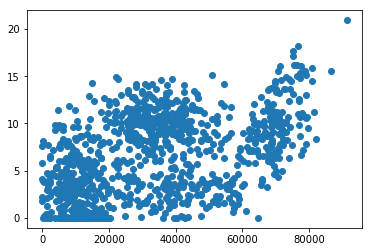

In [36]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.scatter(DatingDataMat[:,0],DatingDataMat[:,1])
plt.show()

# 归一化特征值

In [46]:
def autoNorm(DataSet):
    minValues = DatingDataMat.min(0)
    maxValues = DatingDataMat.max(0)
    Ranges = maxValues - minValues
    NormDataSet = zeros(shape(DataSet))
    m = DataSet.shape[0]
    NormDataSet = DataSet - tile(minValues,(m,1))
    NormDataSet = NormDataSet/tile(Ranges,(m,1))
    return NormDataSet,Ranges,minValues

In [51]:
NormDataSet,Ranges,minValues = autoNorm(DatingDataMat)

array([ 0.      ,  0.      ,  0.001156])

In [59]:
def datingClassTest():
    hoRatio = 0.1
    DatingDataMat,DatingLabels = file2matrix('H:\Desktop\datingTestSet.txt')
    NormDataSet,Ranges,minValues = autoNorm(DatingDataMat)
    m = NormDataSet.shape[0]
    NumTestVecs = int(m*hoRatio)#前多少行为测试数据，后面为对比数据
    errorCount = 0.0
    for i in range(NumTestVecs):
        ClassifierResult = classify0(NormDataSet[i,:],NormDataSet[NumTestVecs:m,:],DatingLabels[NumTestVecs:m],3)
        print("the classifier came back with:%s,the real answer is:%s"%(ClassifierResult,DatingLabels[i]))
        if(ClassifierResult != DatingLabels[i]):
            errorCount += 1.0
            print("the total error rate is:%f"%(errorCount/float(NumTestVecs)))

In [60]:
datingClassTest()

the classifier came back with:largeDoses,the real answer is:largeDoses
the classifier came back with:smallDoses,the real answer is:smallDoses
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came back with:largeDoses,the real answer is:largeDoses
the classifier came back with:largeDoses,the real answer is:largeDoses
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came back with:largeDoses,the real answer is:largeDoses
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came back with:smallDoses,the real answer is:smallDoses
the classifier came back with:didntLike,the real answer is:didntLike
the classifier came ba